# Shared Bikes Demand Prediction

## Introduction
<p>A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.<p/>
<p>A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. <p/>
<p>Company wants to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:<p/>

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Objective
<p>The Objective is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.<p/>

<hr />  

## Data Dictionary

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================
License
========================================= <br/>
Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

=========================================
Contact
========================================= <br/>
	
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)

<hr />  

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score 

import warnings
warnings.filterwarnings('ignore')

## Reading Data - Daily Bike deman data in python dataframe

In [2]:
# Importing dataset into 'demand_df' python dataframe - Daily Bike demands across the American Market
demand_df = pd.read_csv('Datasets/Day.csv')
demand_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the row and column count of the dataset
demand_df.shape

(730, 16)

In [4]:
# Checking the field list, data types and null value count if any
demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Above result also shows that there is no Null values as the non-null count of all the fields and the total number entries are same. <br/>
However, let us confirm with isnull() function.

In [5]:
# Check Null values
demand_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Checking statistics of the dataframe
demand_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<br/>

## Data Preparation

### Checking outliers in the data.

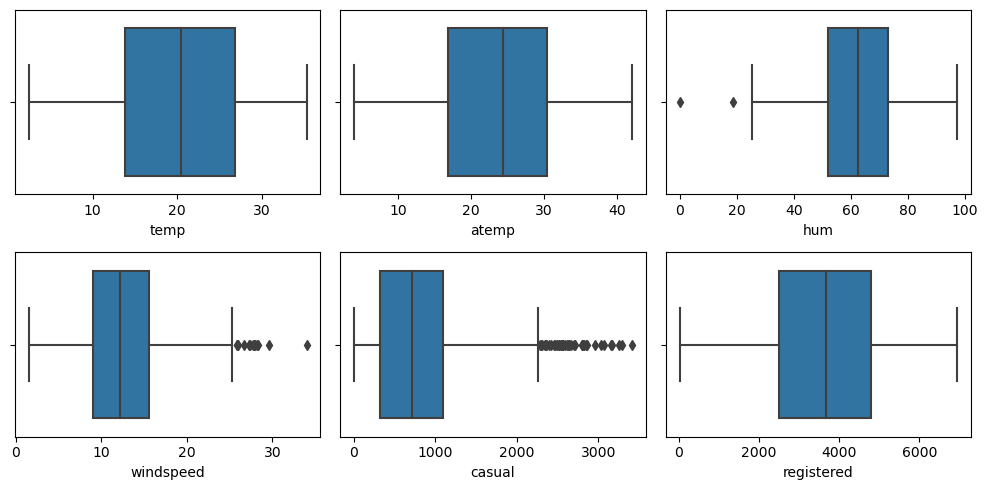

In [7]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize=(10,5))
plt1 = sns.boxplot(demand_df['temp'], ax = axs[0, 0])
plt2 = sns.boxplot(demand_df['atemp'], ax = axs[0, 1])
plt3 = sns.boxplot(demand_df['hum'], ax = axs[0, 2])
plt4 = sns.boxplot(demand_df['windspeed'], ax = axs[1, 0])
plt5 = sns.boxplot(demand_df['casual'], ax = axs[1, 1])
plt6 = sns.boxplot(demand_df['registered'], ax = axs[1, 2])

plt.tight_layout()

`widnspeed` and `casual` columns have considerable outliers <br/>
We can drop the outliers as we have sufficient data.

#### Outlier treatment for 'windspeed' column

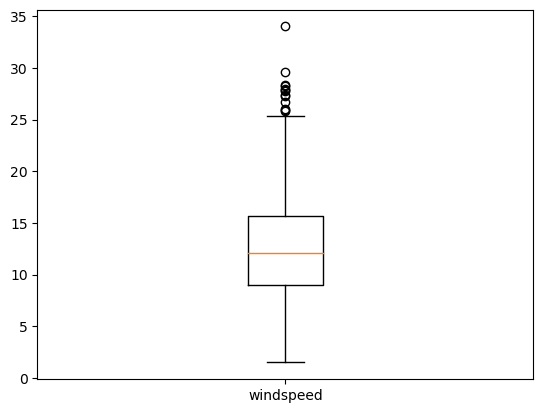

In [8]:
# Before dropping outlier from 'windspeed' column
plt.boxplot(demand_df.windspeed)
plt.xticks([1],['windspeed'])
plt.show()

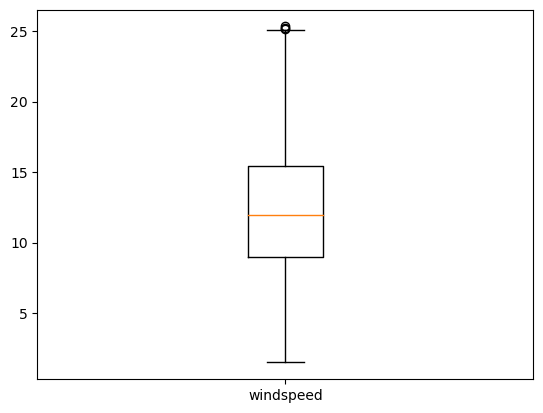

In [9]:
# Dropping outlier from 'windspeed' column
Q1 = demand_df.windspeed.quantile(0.25)
Q3 = demand_df.windspeed.quantile(0.75)
IQR = Q3 - Q1
demand_df2 = demand_df[(demand_df.windspeed >= Q1-1.5*IQR) & (demand_df.windspeed <= Q3+1.5*IQR)]

# After dropping outlier from 'windspeed' column
plt.boxplot(demand_df2.windspeed)
plt.xticks([1],['windspeed'])
plt.show()

In [10]:
# Checking the updated shape of the demand data
demand_df2.shape

(717, 16)

#### Outlier treatment for 'casual' column

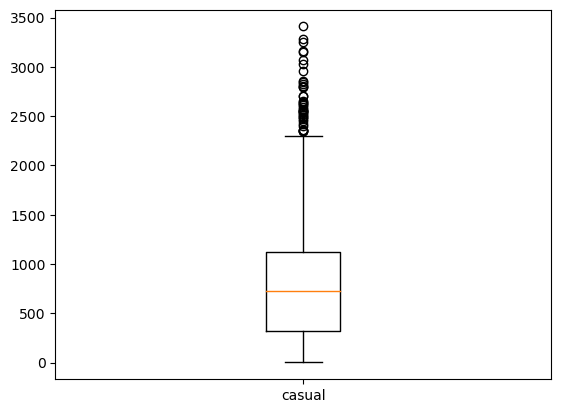

In [11]:
# Before dropping outlier from 'casual' column
plt.boxplot(demand_df2.casual)
plt.xticks([1],['casual'])
plt.show()

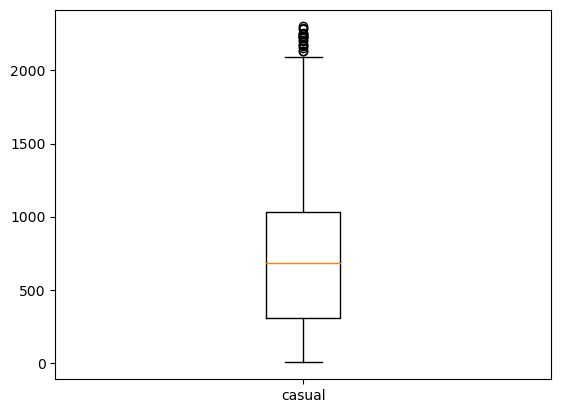

In [12]:
# Dropping outlier from 'casual' column
Q1 = demand_df2.casual.quantile(0.25)
Q3 = demand_df2.casual.quantile(0.75)
IQR = Q3 - Q1
demand_df2 = demand_df2[(demand_df2.casual >= Q1-1.5*IQR) & (demand_df2.casual <= Q3+1.5*IQR)]

# After dropping outlier from 'casual' column
plt.boxplot(demand_df2.casual)
plt.xticks([1],['casual'])
plt.show()

In [13]:
# Checking the updated shape of the demand data
demand_df2.shape

(676, 16)

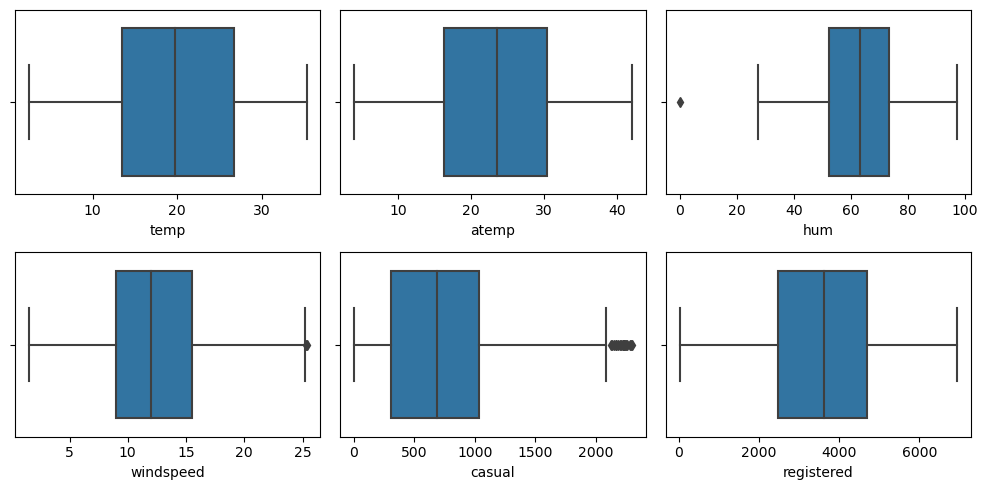

In [14]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize=(10,5))
plt1 = sns.boxplot(demand_df2['temp'], ax = axs[0, 0])
plt2 = sns.boxplot(demand_df2['atemp'], ax = axs[0, 1])
plt3 = sns.boxplot(demand_df2['hum'], ax = axs[0, 2])
plt4 = sns.boxplot(demand_df2['windspeed'], ax = axs[1, 0])
plt5 = sns.boxplot(demand_df2['casual'], ax = axs[1, 1])
plt6 = sns.boxplot(demand_df2['registered'], ax = axs[1, 2])

plt.tight_layout()

# Exploratory Data Analysis

## Visualizing numerical variables

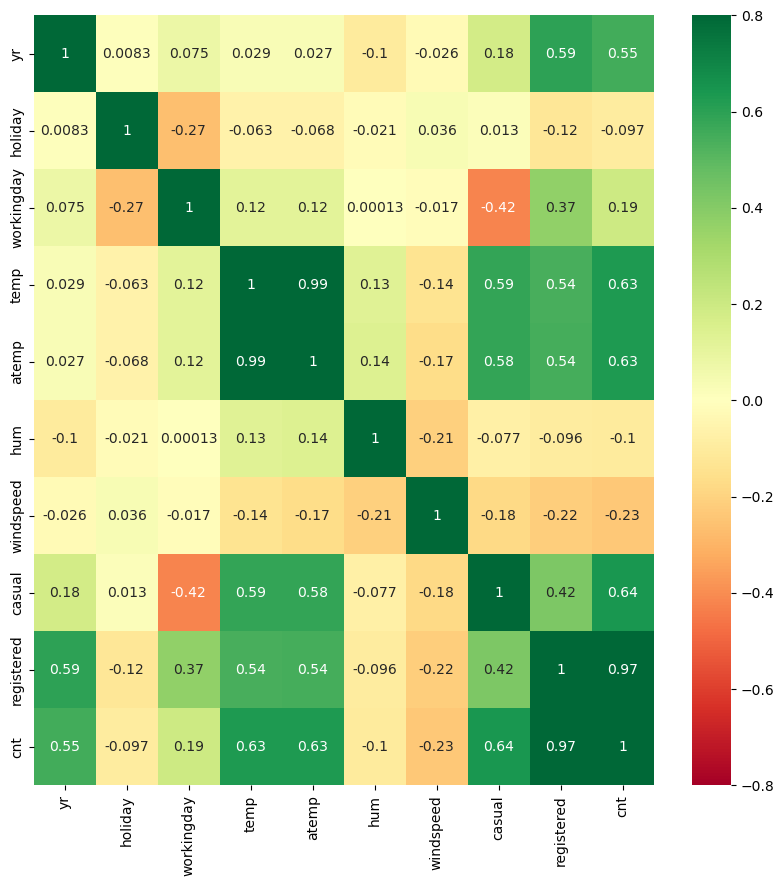

In [15]:
# Heatmap relation betweeen numeric columns
corr = demand_df2[['yr','holiday','workingday','temp','atemp','hum','windspeed','casual','registered','cnt']].corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
plt.show()

`registered` column is highly correlated with target variable `cnt`.

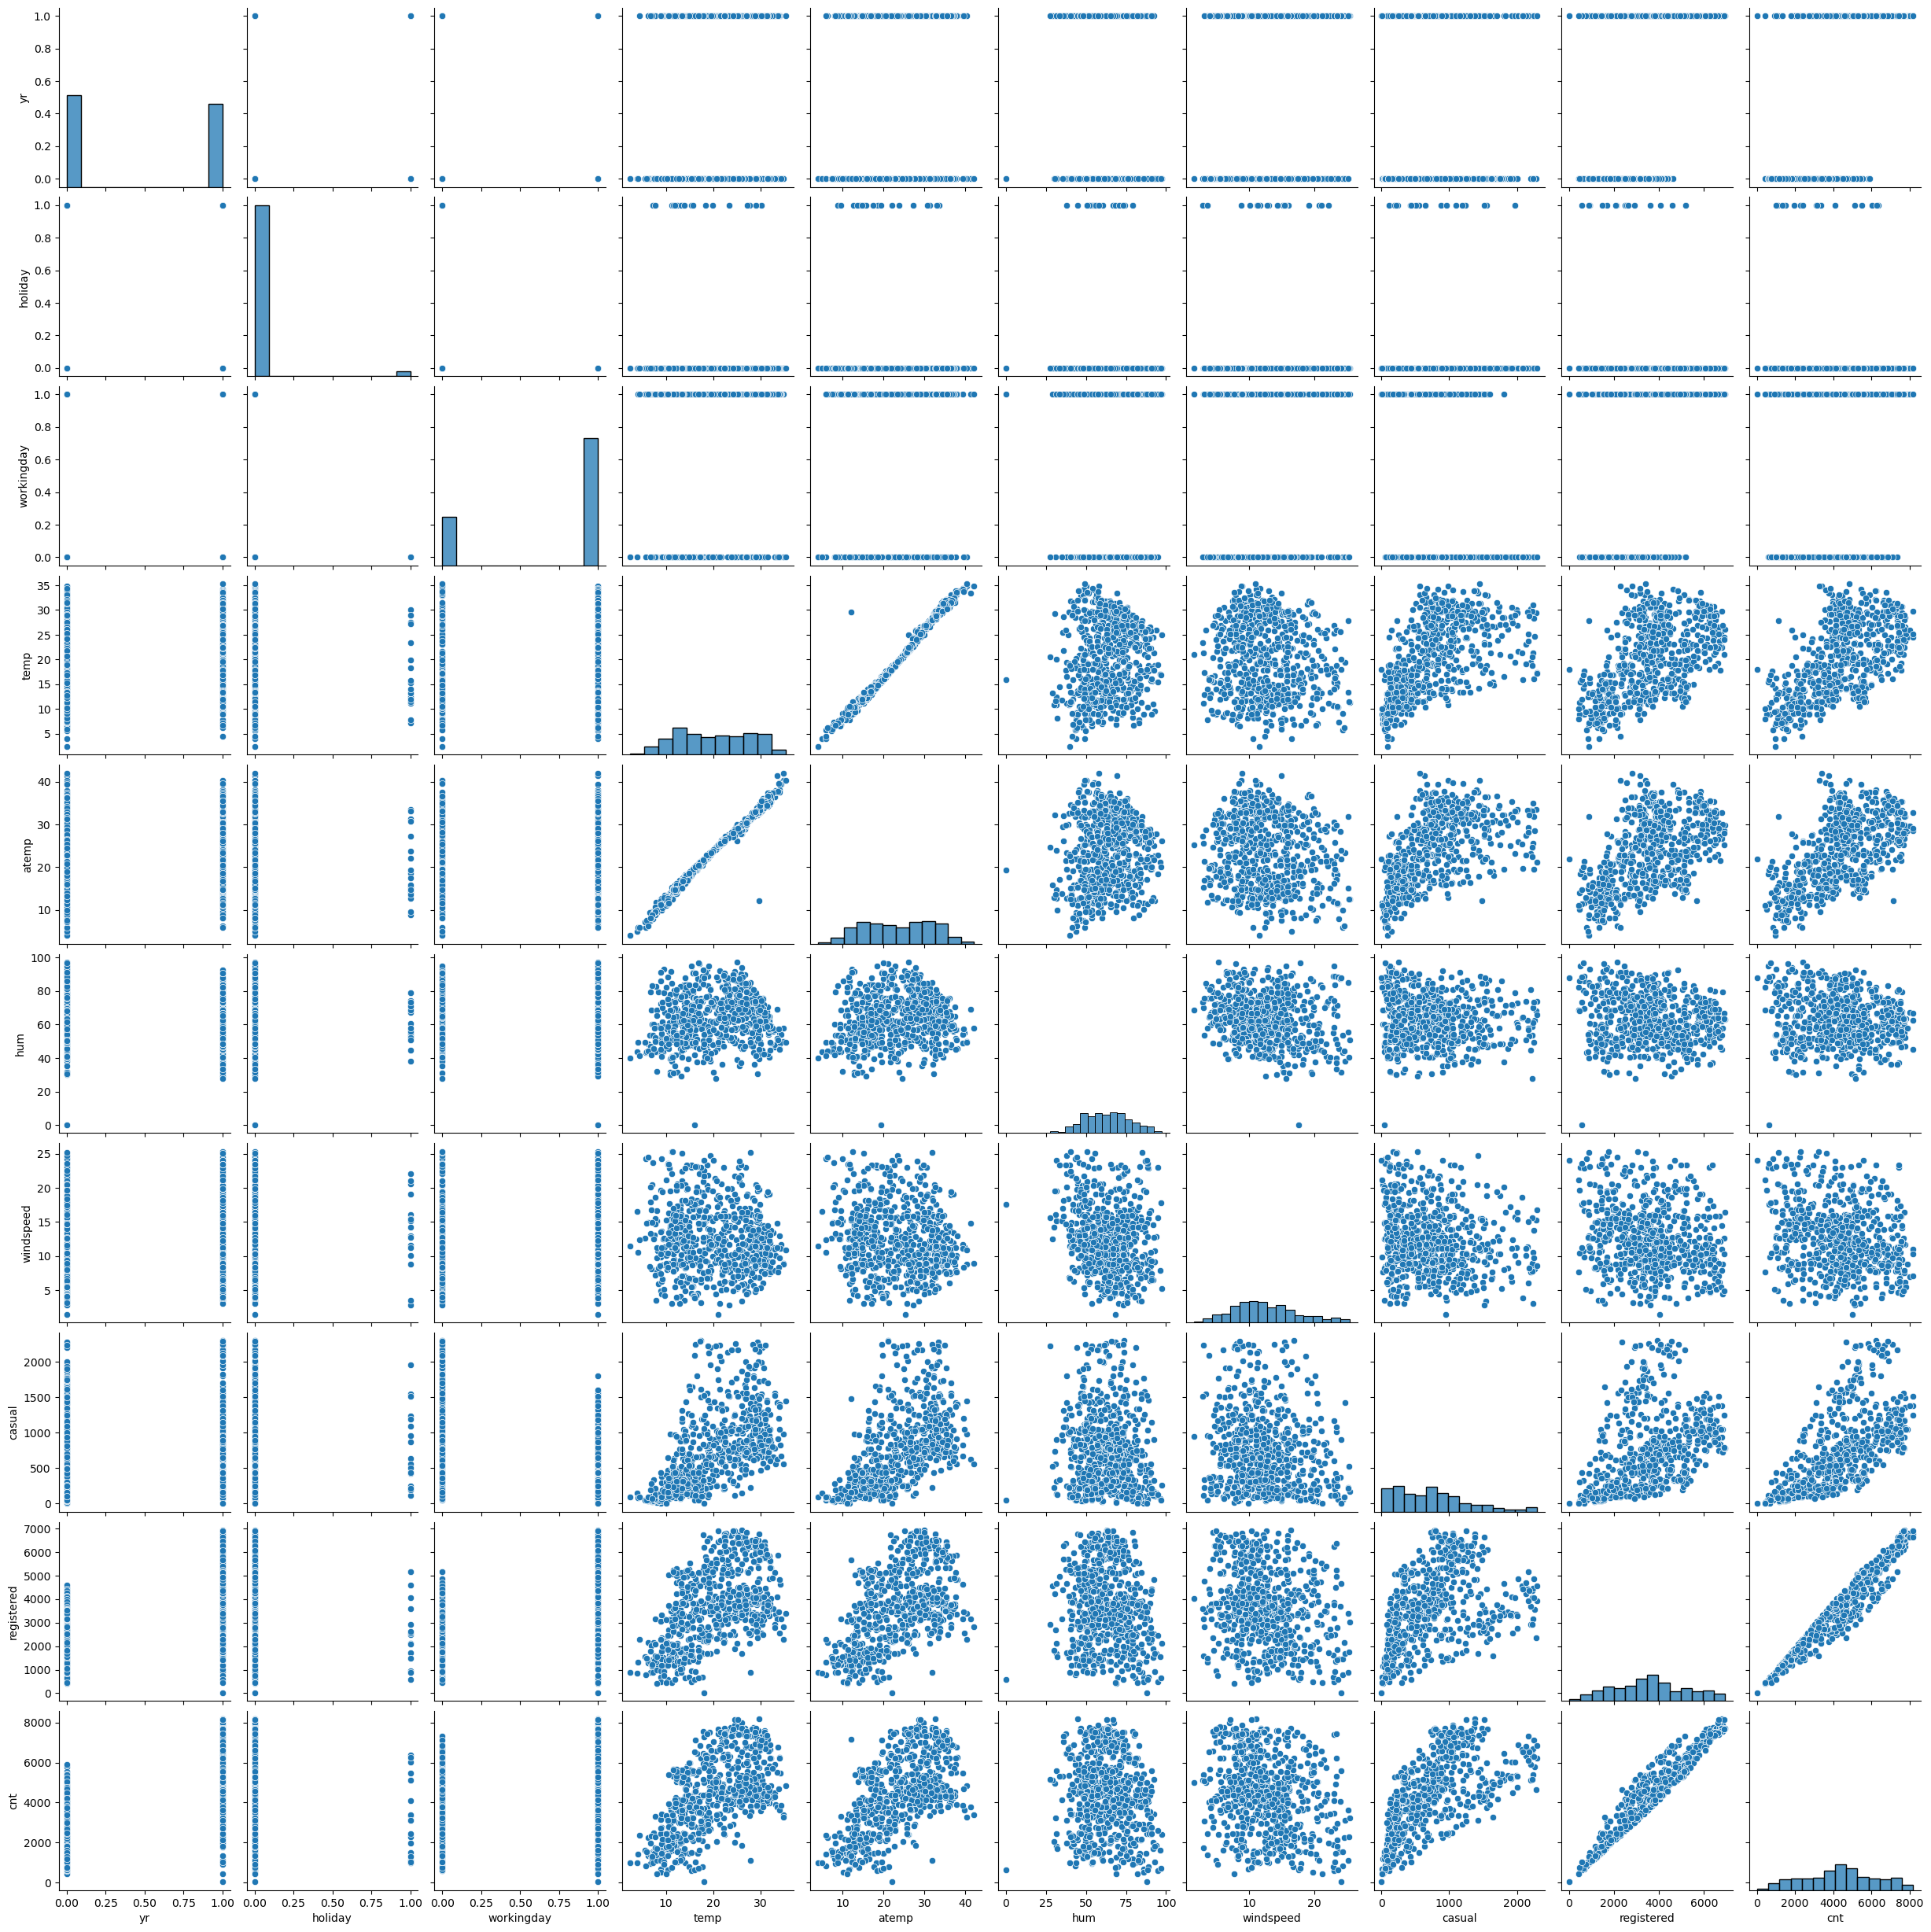

In [16]:
# Let us visualize correlation between all numerical variables
sns.pairplot(demand_df2, vars=demand_df2[['yr','holiday','workingday','temp','atemp','hum','windspeed','casual','registered','cnt']])
plt.show()

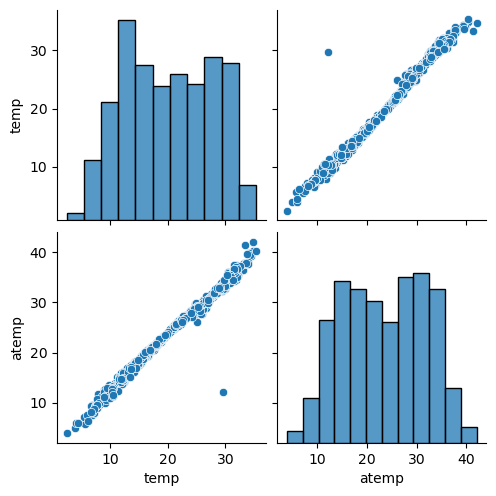

In [17]:
# Let us visualize correlation between temp and atemp features
sns.pairplot(demand_df2, vars=["temp","atemp"])
plt.show()

Features `temp` and `atemp` are highly correlated.

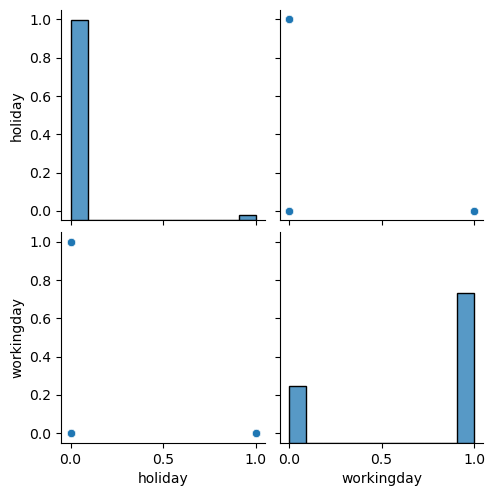

In [18]:
# Let us visualize correlation between holiday and workingday features
sns.pairplot(demand_df2, vars=["holiday","workingday"])
plt.show()

`Holidays` are always on non-working days and `holiday` and `workingday` both the features are highly correlated.

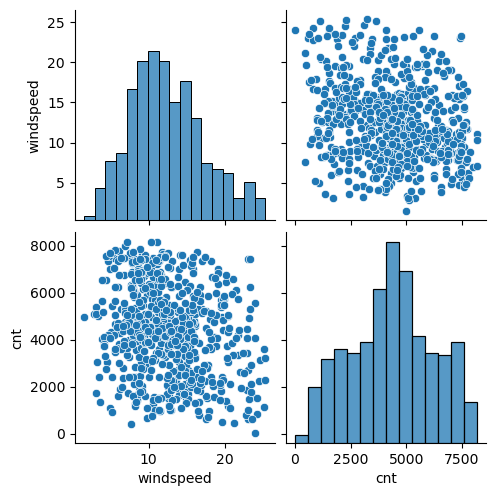

In [19]:
# Let us visualize correlation between holiday and workingday features
sns.pairplot(demand_df2, vars=["windspeed","cnt"])
plt.show()

As per heatmap and above pairplot, `windspeed` column has very loose correlation with `cnt' column.

## Feature Elimination - I

In [20]:
demand_df2.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [21]:
# Dropping instance, dteday, casual and registered features as these features are individual features for target feature 'cnt'
# Also the features instance and dteday have more granularity 
demand_df3 = demand_df2.drop(['instant','dteday','casual','registered'], axis=1)

In [22]:
# Dropping 'Holidays' feature as those are always on non-working days
demand_df3 = demand_df3.drop(['holiday'], axis=1)

In [23]:
# Dropping 'atemp' feature as it is highliy correlated to 'teamp' feature
demand_df3 = demand_df3.drop(['atemp'], axis=1)

In [24]:
# Dropping 'windspeed' feature as it is very poorly co-related to the target feature 'cnt'
demand_df3 = demand_df3.drop(['windspeed'], axis=1)

## Visualizing categorical variables

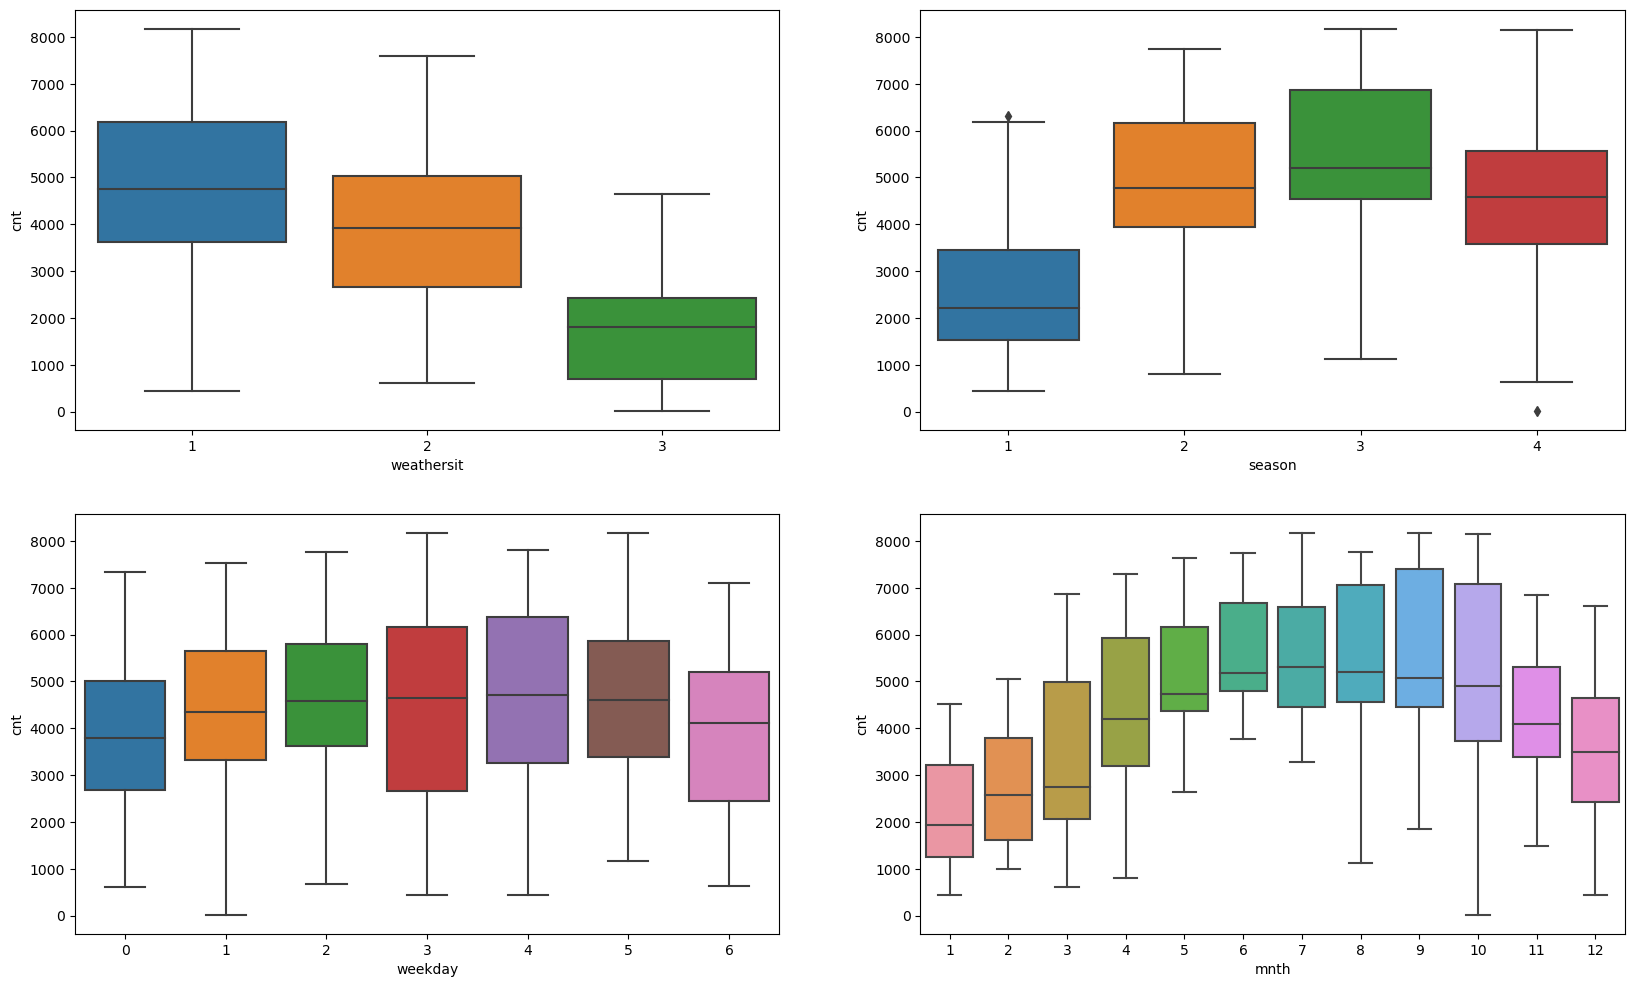

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = demand_df3)
plt.subplot(2,2,2)
sns.boxplot(x = 'season', y = 'cnt', data = demand_df3)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = demand_df3)
plt.subplot(2,2,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = demand_df3)
plt.show()

As per data dictionary, 0 represents year 2018 and 1 represents year 2019. <br/>
Let us see, how total bike user count is spreaded across years.

[Text(0, 0, '1203245'), Text(0, 0, '1752757')]

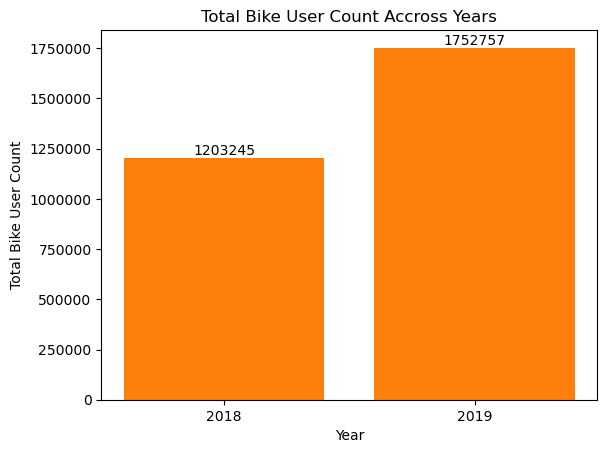

In [26]:
# generate sample data for this example
xs = ['2018','2019'] #[1,2,3,4,5,6,7,8,9,10,11,12]
ys= [(demand_df3['cnt'][demand_df3['yr']==0]).sum(),
     (demand_df3['cnt'][demand_df3['yr']==1]).sum()]

    # [1243103, 2047742] # np.random.normal(loc=0,size=12, scale=500000) + 1000000

fig, ax = plt.subplots()
bar_container = ax.bar(xs, ys)
# plot the data
plt.bar(xs,ys)

plt.ylabel("Total Bike User Count")
plt.xlabel("Year")
plt.title("Total Bike User Count Accross Years")

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.bar_label(bar_container, labels=ys)

We can see that the demand for the shared bikes is increasing over the year, however, we can observe the increase in user count over the year. Hence, we'll keep this field.

Reference link for bar chart and labels: `https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py`

<hr/>

## Feature Elimination - II

In [27]:
# Dropping season and yr features as those are mapped with month feature 
demand_df3 = demand_df3.drop(['season'], axis=1)

In [28]:
# Creating a new data frame for dummy variable creation
demand_df4 = demand_df3.copy()

### Dummy Variables

As per the Data Dictionary, features `weathersit`, `mnth` and `weekday` contain values 1,2,3,4... which have specific labels associated with them. As per the labels and the nature of the features there is no order in these values, hence, let us convert these feature values into categorical string values for further processing.

#### Converting 'weathersit' numeric labels values to categorical string values

In [29]:
# Checking current values in the features 'weathersit'
demand_df4['weathersit'].value_counts().sort_index()

1    422
2    233
3     21
Name: weathersit, dtype: int64

Actual categorical values as per the data dictionary for the 'weathersit' feature is as below:

```
1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 
2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 
3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
```

<b>However, for easy reading, keeping the first words of each category.</b>

In [30]:
# creating dictionary for mapping the string values for 'weathersit'
weathersit_dict = {1: 'Clear', 2: 'Mist', 3: 'LightSnow', 4: 'HeavyRain'}

# Converting 'weathersit' numeric labels values to categorical string values
demand_df4[['weathersit']] = demand_df4[['weathersit']].apply(lambda x: x.map(weathersit_dict))

# Creating dummy variables for 'weathersit' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(demand_df4['weathersit'], drop_first=True)
# status.head()

# Merging the dummy variables with the original dataframe
demand_df4 = pd.concat([demand_df4,status], axis=1)

# Drop 'weathersit' as we have created the dummies for it
demand_df4.drop(['weathersit'], axis = 1, inplace = True)
demand_df4.head()

,yr,mnth,weekday,workingday,temp,hum,cnt,LightSnow,Mist
0,0,1,6,0,14.110847,80.5833,985,0,1
1,0,1,0,0,14.902598,69.6087,801,0,1
2,0,1,1,1,8.050924,43.7273,1349,0,0
3,0,1,2,1,8.200000,59.0435,1562,0,0
4,0,1,3,1,9.305237,43.6957,1600,0,0


Note that there is no fourth category 'HeavyRain' data available in the dataset itself.
<hr/> 

#### Converting 'mnth' numeric labels values to categorical string values

In [31]:
# Checking current values in the features 'mnth'
demand_df4['mnth'].value_counts().sort_index()

1     61
2     52
3     57
4     53
5     54
6     53
7     57
8     60
9     52
10    56
11    60
12    61
Name: mnth, dtype: int64

In [32]:
# creating dictionary for mapping the string values for 'mnth'
mnth_dict = { 1: 'Jan', 2: 'Feb', 3: 'Mar',4: 'Apr', 5: 'May', 6: 'Jun',
              7: 'Jul',8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov',12: 'Dec'}

# Converting 'weekday' numeric labels values to categorical string values
demand_df4[['mnth']] = demand_df4[['mnth']].apply(lambda x: x.map(mnth_dict))

# Creating dummy variables for 'weekday' feature and saving into the dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(demand_df4['mnth'], drop_first=True)
# status.head()

# Merging the dummy variables with the original dataframe
demand_df4 = pd.concat([demand_df4,status], axis=1)

# Drop 'mnth' as we have created the dummies for it
demand_df4.drop(['mnth'], axis = 1, inplace = True)
demand_df4.head()

,yr,weekday,workingday,temp,hum,cnt,LightSnow,Mist,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,6,0,14.110847,80.5833,985,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,801,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,1,1,8.050924,43.7273,1349,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,2,1,8.200000,59.0435,1562,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,3,1,9.305237,43.6957,1600,0,0,0,0,0,1,0,0,0,0,0,0,0


<hr/>

#### Converting 'weekday' numeric labels values to categorical string values

In [33]:
# Checking current values in the features 'season'
demand_df4['weekday'].value_counts().sort_index()

0     89
1    100
2    103
3    101
4    102
5    102
6     79
Name: weekday, dtype: int64

In [34]:
# Let us check for the values in 'workingday','weekday' fields.
demand_df4[['workingday','weekday','cnt']].groupby(by=['weekday','workingday']).sum()

cnt
weekday workingday        
0       0           345043
1       0            47519
        1           385312
2       0             1013
        1           466301
3       1           460435
4       0             3920
        1           471898
5       0             6494
        1           468365
6       0           299702

Thus, week is starting with 0 as Sunday and ending with 6 as Saturday.

In [35]:
# creating dictionary for mapping the string values for 'weekday'
weekday_dict = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}

# Converting 'weekday' numeric labels values to categorical string values
demand_df4[['weekday']] = demand_df4[['weekday']].apply(lambda x: x.map(weekday_dict))

# Creating dummy variables for 'weekday' feature and saving into the dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(demand_df4['weekday'], drop_first=True)
# status.head()

# Merging the dummy variables with the original dataframe
demand_df4 = pd.concat([demand_df4,status], axis=1)

# Drop 'weekday' as we have created the dummies for it
demand_df4.drop(['weekday'], axis = 1, inplace = True)
demand_df4.head()

,yr,workingday,temp,hum,cnt,LightSnow,Mist,Aug,Dec,Feb,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,14.110847,80.5833,985,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,14.902598,69.6087,801,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,8.050924,43.7273,1349,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,8.200000,59.0435,1562,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,9.305237,43.6957,1600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<br/>
<hr/>

# Splitting data into the Training and Test Sets <br/>

In [ ]:
# - Moved to the top of this document
# Import library
# from sklearn.model_selection import train_test_split

In [36]:
# Creating Train and Test datasets
np.random.seed(0)
df_train, df_test = train_test_split(demand_df4, train_size=0.7, test_size=0.3, random_state=100)

In [37]:
# View the shape of train data
df_train.shape

(473, 24)

In [38]:
# View the shape of test data
df_test.shape

(203, 24)

## Rescaling the features

In [ ]:
# - Moved to the top of this document
# Import library 
# from sklearn.preprocessing import MinMaxScaler

In [39]:
# Initiate an object
scaler = MinMaxScaler()

In [40]:
# Apply the scaler to all the numerica variables except 'yes-no' and dummy features
# Create a list of numeric vars
num_var = ['temp','hum','cnt']

# Fit on data
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,yr,workingday,temp,hum,cnt,LightSnow,Mist,Aug,Dec,Feb,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
642,1,1,0.692641,0.645244,0.998578,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
278,0,1,0.542077,0.638389,0.560238,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
464,1,1,0.482890,0.447301,0.709281,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
658,1,0,0.504695,0.524422,0.826396,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
131,0,1,0.592957,0.768638,0.573035,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [41]:
# let us confirm the scalling by checking max value
df_train.describe()

,yr,workingday,temp,hum,cnt,LightSnow,Mist,Aug,Dec,Feb,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,...,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000
mean,0.479915,0.725159,0.528441,0.650239,0.508624,0.023256,0.363636,0.076110,0.088795,0.078224,...,0.084567,0.093023,0.082452,0.080338,0.141649,0.109937,0.137421,0.150106,0.139535,0.145877
std,0.500125,0.446907,0.231443,0.146627,0.243570,0.150874,0.481555,0.265455,0.284749,0.268808,...,0.278530,0.290773,0.275344,0.272104,0.349059,0.313142,0.344655,0.357553,0.346871,0.353357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.331287,0.545416,0.332730,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.504695,0.650814,0.508273,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.754499,0.680843,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


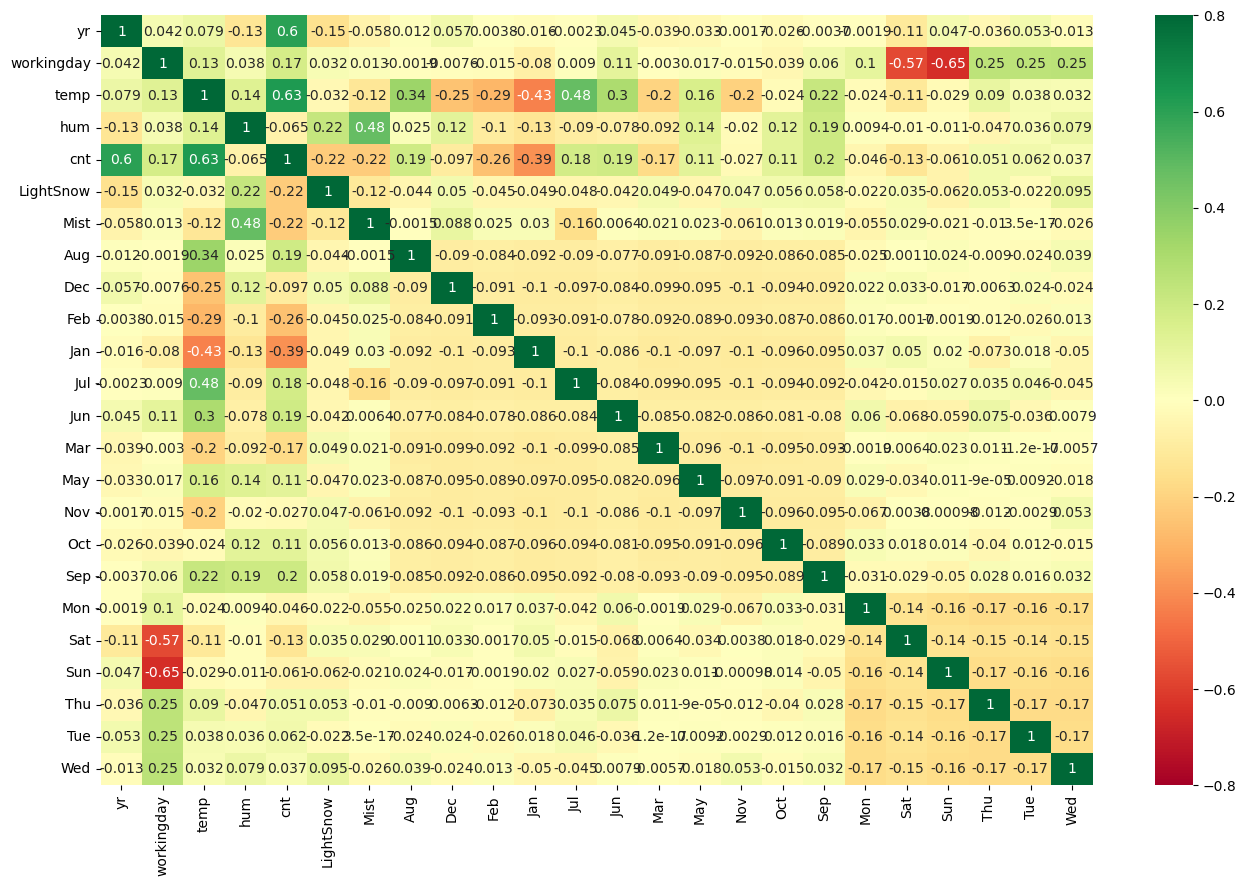

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, 
            vmax=0.8, vmin=-0.8, 
            cmap='RdYlGn') #cmap="YlGnBu")
plt.show()

## Model Building

Creating new features, X and y for model building

In [43]:
# Creating X_train, y_train variables for model train
y_train = df_train.pop('cnt')
X_train = df_train

In [44]:
# View the y_train data
y_train.head()

642    0.998578
278    0.560238
464    0.709281
658    0.826396
131    0.573035
Name: cnt, dtype: float64

In [45]:
# View the X_train data
X_train.head()

,yr,workingday,temp,hum,LightSnow,Mist,Aug,Dec,Feb,Jan,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
642,1,1,0.692641,0.645244,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
278,0,1,0.542077,0.638389,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
464,1,1,0.482890,0.447301,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
658,1,0,0.504695,0.524422,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
131,0,1,0.592957,0.768638,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


### Building Linear Model

In [ ]:
# - Moved to the top of this document
# Importing LinearRegression 
# from sklearn.linear_model import LinearRegression

In [47]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### RFE - Recursive Feature Elimination



In [ ]:
# - Moved to the top of this document
# Importing RFE
# from sklearn.feature_selection import RFE

In [48]:
# Running RFE with the output number of the variable equal to 10
rfe = RFE(lm, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', False, 2),
 ('LightSnow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 9),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', True, 1),
 ('May', False, 7),
 ('Nov', False, 6),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 12),
 ('Tue', False, 10),
 ('Wed', False, 13)]

In [50]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'LightSnow', 'Mist', 'Feb', 'Jan', 'Jul', 'Mar', 'Oct',
       'Sep'],
      dtype='object')

In [51]:
X_train.columns[~rfe.support_]

Index(['workingday', 'hum', 'Aug', 'Dec', 'Jun', 'May', 'Nov', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

<strong>Let us try training the model with single field 'workingday' field.<strong/> <br/>

In [ ]:
# - Moved to the top of this document
# import statsmodels.api library 
# import statsmodels.api as sm  

In [52]:
# add a constant
X_train_sm = sm.add_constant(X_train['workingday'])

# create first model
lr = sm.OLS(y_train, X_train_sm).fit()

# params
lr.params

const         0.440859
workingday    0.093449
dtype: float64

<strong>Observation:</strong> <br/>
&emsp;&emsp;Here we can see that the coefficient is positive. <br />
&emsp;&emsp;Let us check the model summary

In [53]:
# Let us view the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     14.27
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           0.000179
Time:                        00:50:37   Log-Likelihood:                 4.4410
No. Observations:                 473   AIC:                            -4.882
Df Residuals:                     471   BIC:                             3.436
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4409      0.021     20.925      0.000       0.399       0.482
workingday     0.0934      0.025      3.777      0.000       0.045       0.142
==============================================================================
Omnibus:                       52.507   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.621
Skew:                          -0.079   Prob(JB):                     0.000405
Kurtosis:                       2.124   Cond. No.                         3.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<strong>Observation:</strong> <br/>
&emsp;&emsp;Here P-Value is less than 0.05 hence the model is ok. <br/>
&emsp;&emsp;However the R-squared value is very low, which means there is very low significance of the 'workingday' field on our model.

<b>Let us try adding one more variable to the model and check the performance.<b/>

In [54]:
# add a constant
X_train_sm = sm.add_constant(X_train[['workingday','temp']])

# create first model
lr = sm.OLS(y_train, X_train_sm).fit()

# Let us view the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     159.4
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.43e-53
Time:                        00:50:52   Log-Likelihood:                 119.84
No. Observations:                 473   AIC:                            -233.7
Df Residuals:                     470   BIC:                            -221.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1286      0.025      5.238      0.000       0.080       0.177
workingday     0.0507      0.020      2.593      0.010       0.012       0.089
temp           0.6495      0.038     17.194      0.000       0.575       0.724
==============================================================================
Omnibus:                       30.353   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.007
Skew:                           0.162   Prob(JB):                      0.00150
Kurtosis:                       2.255   Cond. No.                         6.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the R-squared value is increasing, however, the coef value is chaning due to addition of the new field.
<hr/>

## Let us check other way by adding all the features and will remove the features which is not significant or by looking into the corelation with other variables.

In [55]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_rfe)

# Running the linear model
lr = sm.OLS(y_train,X_train_rfe).fit()

# Let's see the summary of our linear model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1085.
Date:                Wed, 21 Jun 2023   Prob (F-statistic):                   4.75e-314
Time:                        00:51:00   Log-Likelihood:                          355.79
No. Observations:                 473   AIC:                                     -691.6
Df Residuals:                     463   BIC:                                     -650.0
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr             0.2782      0.011     26.254      0.000       0.257       0.299
temp           0.7445      0.017     44.883      0.000       0.712       0.777
LightSnow     -0.2388      0.036     -6.673      0.000      -0.309      -0.168
Mist          -0.0552      0.011     -5.065      0.000      -0.077      -0.034
Feb           -0.0424      0.020     -2.157      0.031      -0.081      -0.004
Jan           -0.0565      0.018     -3.117      0.002      -0.092      -0.021
Jul           -0.1374      0.022     -6.378      0.000      -0.180      -0.095
Mar            0.0050      0.018      0.271      0.786      -0.031       0.041
Oct            0.1332      0.020      6.786      0.000       0.095       0.172
Sep            0.0544      0.021      2.627      0.009       0.014       0.095
==============================================================================
Omnibus:                       50.316   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.270
Skew:                          -0.751   Prob(JB):                     3.34e-16
Kurtosis:                       4.167   Cond. No.                         6.25
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculate the VIFs for the model

In [ ]:
# - Moved to the top of this document
# Importing VIF library 
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# List out the VIF values
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.26
0,yr,1.92
3,Mist,1.54
6,Jul,1.47
9,Sep,1.23
8,Oct,1.13
7,Mar,1.10
5,Jan,1.09
4,Feb,1.08
2,LightSnow,1.06


### Developed an automated way for reviewing the p-value and VIF instead of manually checking the above summary/table outputs.

In [ ]:
# Importing LinearRegression - Moved to the top of this document
# from sklearn.linear_model import LinearRegression

In [57]:
# Let us review the p-value and VIF
max_p_value = max(lr.pvalues)
max_p_value_feature = pd.DataFrame(lr.pvalues)[pd.DataFrame(lr.pvalues).values==max(lr.pvalues)].index.values[0]
vif4p_value = vif[vif['Features']==max_p_value_feature]['VIF'].values[0]
print("Maximum p-value         : ",max_p_value,'\n',
      "Feature with Max p-value: ",max_p_value_feature,'\n',
      "Corresponding VIF value : ",vif[vif['Features']==max_p_value_feature]['VIF'].values[0],sep='')
if max_p_value > 0.05:
    print("\nSince the p-value of variable '",max_p_value_feature,
          "' is too high, i.e. ",max_p_value,', let us drop this variable and re-build the model.',sep='')
elif vif4p_value > 5:
    print("Since the VIF value of variable '",max_p_value_feature,
          "' is high, i.e. ",vif4p_value,', let us drop this variable and re-build the model.\n\n',sep='')    
else:
    print('\nModel looks good.\n\n')

Maximum p-value         : 0.7862260410753197
Feature with Max p-value: Mar
Corresponding VIF value : 1.1

Since the p-value of variable 'Mar' is too high, i.e. 0.7862260410753197, let us drop this variable and re-build the model.


In [58]:
X_train_rfe = X_train_rfe.drop(max_p_value_feature, axis = 1)

In [59]:
# Re-build the model
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model and fit
lr = sm.OLS(y_train,X_train_rfe).fit()

# Let's see the summary of our linear model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     229.4
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          1.83e-164
Time:                        00:52:53   Log-Likelihood:                 398.82
No. Observations:                 473   AIC:                            -777.6
Df Residuals:                     463   BIC:                            -736.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1747      0.018      9.618      0.000       0.139       0.210
yr             0.2584      0.010     26.173      0.000       0.239       0.278
temp           0.4997      0.030     16.869      0.000       0.441       0.558
LightSnow     -0.2934      0.033     -8.878      0.000      -0.358      -0.228
Mist          -0.0836      0.010     -8.103      0.000      -0.104      -0.063
Feb           -0.1225      0.020     -6.210      0.000      -0.161      -0.084
Jan           -0.1563      0.019     -8.028      0.000      -0.195      -0.118
Jul           -0.0833      0.020     -4.088      0.000      -0.123      -0.043
Oct            0.1058      0.018      5.862      0.000       0.070       0.141
Sep            0.0738      0.019      3.908      0.000       0.037       0.111
==============================================================================
Omnibus:                       84.927   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.953
Skew:                          -1.008   Prob(JB):                     6.80e-36
Kurtosis:                       5.038   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# List out the VIF values
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.09
2,temp,2.00
7,Jul,1.44
6,Jan,1.37
5,Feb,1.20
9,Sep,1.13
3,LightSnow,1.06
4,Mist,1.05
8,Oct,1.05
1,yr,1.04


In [61]:
# Let us review the p-value and VIF
max_p_value = max(lr.pvalues)
max_p_value_feature = pd.DataFrame(lr.pvalues)[pd.DataFrame(lr.pvalues).values==max(lr.pvalues)].index.values[0]
vif4p_value = vif[vif['Features']==max_p_value_feature]['VIF'].values[0]
print("Maximum p-value         : ",max_p_value,'\n',
      "Feature with Max p-value: ",max_p_value_feature,'\n',
      "Corresponding VIF value : ",vif[vif['Features']==max_p_value_feature]['VIF'].values[0],sep='')
if max_p_value > 0.05:
    print("\nSince the p-value of variable '",max_p_value_feature,
          "' is too high, i.e. ",max_p_value,', let us drop this variable and re-build the model.',sep='')
elif vif4p_value > 5:
    print("Since the VIF value of variable '",max_p_value_feature,
          "' is high, i.e. ",vif4p_value,', let us drop this variable and re-build the model.\n\n',sep='')    
else:
    print('\nModel looks good.\n\n')

Maximum p-value         : 0.00010695171557995959
Feature with Max p-value: Sep
Corresponding VIF value : 1.13

Model looks good.





## Residual Analysis of the train data

In [62]:
# Let us predict y_train data based on rfe columns
y_train_cnt = lr.predict(X_train_rfe)

In [63]:
# Calculating residual value
res = (y_train_cnt - y_train)

In [64]:
# Importing the required libraries for plots.
# import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

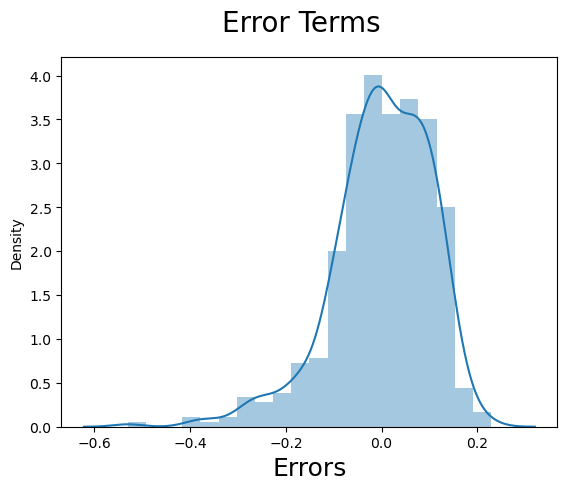

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

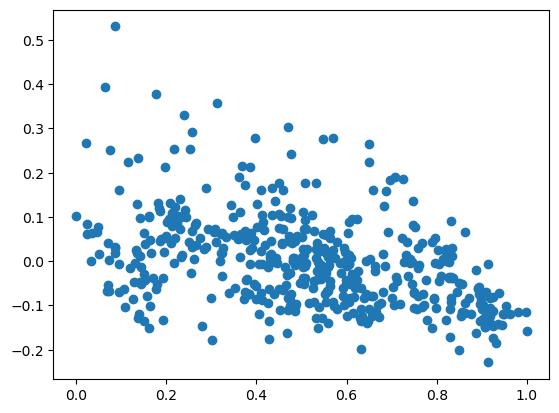

In [66]:
plt.scatter(y_train,res)
plt.show()

## Model Evaluation

### Applying the scaling on the test sets

In [67]:
df_test.head()

,yr,workingday,temp,hum,cnt,LightSnow,Mist,Aug,Dec,Feb,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
137,0,1,22.550000,87.0000,3855,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
570,1,1,29.690847,45.0000,8173,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50,0,0,11.693897,40.7826,1812,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
603,1,1,28.836653,73.0417,6917,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
687,1,1,15.614153,62.3333,5499,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [68]:
# Apply the scaler to all the features except 'yes-no' and dummy features
num_var = ['temp','hum','cnt']

df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,yr,workingday,temp,hum,cnt,LightSnow,Mist,Aug,Dec,Feb,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
137,0,1,0.611648,0.894602,0.442606,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
570,1,1,0.828668,0.462725,1.000776,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50,0,0,0.281715,0.419358,0.178516,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
603,1,1,0.802708,0.751071,0.838418,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
687,1,1,0.400857,0.640959,0.655119,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


#### We can verify that all the test data is scalled properly

In [69]:
df_test.describe()

,yr,workingday,temp,hum,cnt,LightSnow,Mist,Aug,Dec,Feb,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,...,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.463054,0.724138,0.554999,0.648756,0.511666,0.049261,0.300493,0.118227,0.093596,0.073892,...,0.068966,0.078818,0.083744,0.068966,0.162562,0.133005,0.118227,0.152709,0.182266,0.157635
std,0.499866,0.448053,0.227382,0.145533,0.236196,0.216948,0.459606,0.323674,0.291986,0.262241,...,0.254022,0.270120,0.277688,0.254022,0.369877,0.340420,0.323674,0.360596,0.387018,0.365300
min,0.000000,0.000000,0.046591,0.298201,-0.052870,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.362980,0.531920,0.347790,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.564921,0.643530,0.520812,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.754424,0.755458,0.665396,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.983385,0.989717,1.000776,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that all the max values are not 1 which in case of train data was 1. This is because as we know we do not fit the test data, rather we transform the test data. And we are using the min/max values from train data to transform the test data and that's why it is not the exact 1.

Dividing into X_test and y_test

In [70]:
# Creating X_test, y_test variables for model train
y_test = df_test.pop('cnt')
X_test = df_test

In [71]:
# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,workingday,temp,hum,LightSnow,Mist,Aug,Dec,Feb,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
137,1.0,0,1,0.611648,0.894602,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
570,1.0,1,1,0.828668,0.462725,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50,1.0,0,0,0.281715,0.419358,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
603,1.0,1,1,0.802708,0.751071,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
687,1.0,1,1,0.400857,0.640959,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


Now let's use our model to make predictions.

In [72]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test_sm[X_train_rfe.columns]

In [73]:
X_test_rfe.head()

,const,yr,temp,LightSnow,Mist,Feb,Jan,Jul,Oct,Sep
137,1.0,0,0.611648,0,1,0,0,0,0,0
570,1.0,1,0.828668,0,0,0,0,1,0,0
50,1.0,0,0.281715,0,0,1,0,0,0,0
603,1.0,1,0.802708,0,0,0,0,0,0,0
687,1.0,1,0.400857,0,1,0,0,0,0,0


In [74]:
# Making predictions
y_test_pred = lr.predict(X_test_rfe)

In [75]:
# import r2_score library - moved to the top of this document
# from sklearn.metrics import r2_score 
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7471328766250545

We can see that what the model has learned in the training set, It is also able to generate the nearly output on the test set.

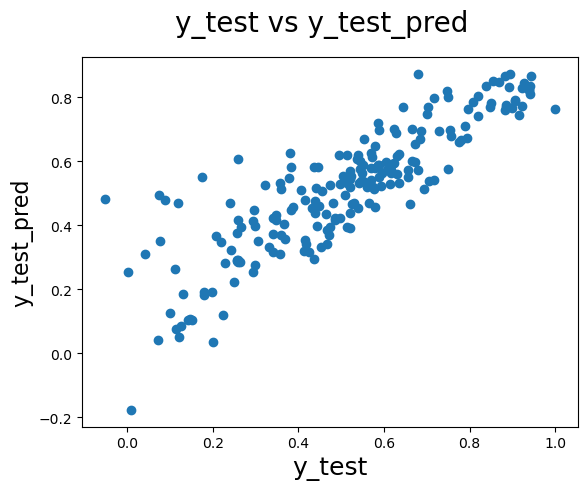

In [76]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

Below is our equation of the best fitted line: <br />
cnt = 0.2574 x yr + 0.5298 x temp - 0.2852 x LightSnow - 0.0825 x Mist - 0.1552 x Jan - 0.1237 x Feb - 0.1017 x Jul + 0.0979 x Oct + 0.1668

Overall we have a descent model, but we also acknowledge that we could do better.
<p> We can try other options like creatin new features like quarters, etc.</p> <br/>
<b> Conclusions: </b> <br/><br/>
1. We can see that the climate has some impact on the modelling, eg. LightSnow and Mist. <br/><br/>
2. Below is our equation of the best fitted line: <br/>
&emsp;cnt = 0.2574 x yr + 0.5298 x temp - 0.2852 x LightSnow - 0.0825 x Mist - 0.1552 x Jan - 0.1237 x Feb - 0.1017 x Jul + 0.0979 x Oct + 0.1668 <br/><br/>
3. As per above model, we can see that the users are perferring more shared bike either at the beginning of the year (Jan+Feb) or beginning of the quarter (Jul, Oct). <br/>

## Additional Item/Automation in model review

I have also tried to automate the validating p-value and VIF through python code instead of manually looking at model.summary and VIF table. <br/>
Reference cell # in this code module.